In [5]:
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



In [104]:
import csv

with open('results/labels_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)
    

In [54]:
import csv

with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)

In [83]:
import csv

with open('results/labels_temp.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses_temp.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy_temp.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)

In [86]:
def exitAccuracy(results, labels, classes=[]):
    """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
    """    
    print("number of classes {}".format(len(classes)))
    print("correct answer {}".format(results.sum()))

    classAcc = {}
    correct =[]
    count = []
    percentage = []
    if len(classes) > 0:
        for i, labelClass in enumerate(classes):            
            correct.append(results[np.where(labels==labelClass)].sum())
            count.append(len(labels[np.where(labels == labelClass)]))
#             try:
            p = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
#             except expression as identifier:
#                 p = 0 
            percentage.append(p)
            classAcc[labelClass] = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
    else: 
        correct.append(results.sum())
        count.append((len(labels)))
        p = results.sum()/len(labels)
        percentage.append(p)
        classAcc["all"] = p
    avgAcc = results.sum()/len(labels)
    
        
    print("correct {}".format(correct))
    print("count {}".format(count))
    print("percentage {}".format(percentage))

    return avgAcc, classAcc


In [98]:
def findMainExitAccuracies(pred, labels, num_outputs, labelClasses=[], output_names=[],graph=True):
        """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
        """
        results = np.equal(pred, labels)
        pred = np.array(pred)
        print(pred.dtype)
        
        labels = np.array(labels)
        
        transpose_results = np.transpose(results) #truths
        transpose_preds = np.transpose(pred) #per exit rather then per input
        transpose_labels = np.transpose(labels)
        # %matplotlib inline
        if graph==True:
            plt.style.use('seaborn-whitegrid')
            fig = plt.figure()
            fig.tight_layout()
        df =  pd.DataFrame() 
        print("correct answers {}".format(transpose_results[0].sum()))
        print("passed results {}".format(len(transpose_results[0])))
        avgAcc, classAcc= exitAccuracy(transpose_results[0],transpose_labels[0],labelClasses)
#         print(avgAcc)
        fig, ax = plt.subplots()
        ticks = []
        if graph==True:
            for i, x in enumerate(classAcc):
                ticks.append(x)
#                 print(x)                
                plt.bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
                if classAcc[x] != 0:
                    if type(x) != str:
                        plt.text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
                    else: 
                        plt.text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, avgAcc, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                plt.hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Accuracy", linestyles="dashed", alpha=0.5)
                plt.text(len(classAcc.keys())-.5, .74, ' Avg Acc%', ha='left', va='center')
            
    #     print(sum(classAcc.values())/len(classAcc.values()))
        if graph==True:
            plt.xticks(ticks)
            plt.title("Class Label Accuracy")
            plt.ylabel("Accuracy %")
            plt.xlabel("Label Class #")
            plt.show()
        return classAcc

float64
correct answers 7395
passed results 10000
number of classes 0
correct answer 7395
correct [7395]
count [10000]
percentage [0.7395]


<Figure size 432x288 with 0 Axes>

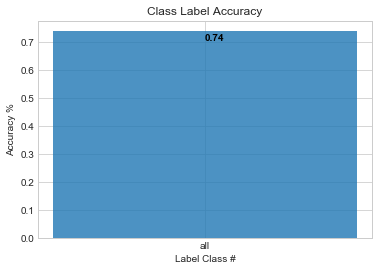

In [105]:
y = findMainExitAccuracies(pred, labels, 4,[], ["dense5","pooling_3","pooling_4","dense_3"])

float64
correct answers 7395
passed results 10000
number of classes 10
correct answer 7395
correct [774, 864, 624, 578, 672, 690, 774, 798, 815, 806]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.774, 0.864, 0.624, 0.578, 0.672, 0.69, 0.774, 0.798, 0.815, 0.806]


<Figure size 432x288 with 0 Axes>

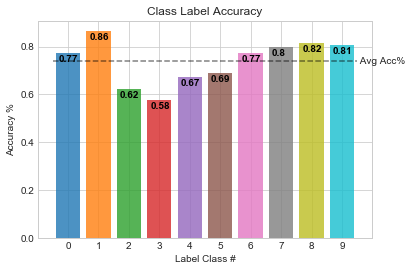

In [106]:
y = findMainExitAccuracies(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])

This graph displays the accuracy rates of each individual class for each exit. It is used for highlighting how at a classification layer different classes will have different accuracy rates.

In [107]:

def graphclassAccuracy(pred, labels, num_outputs, classes, output_names=[],graph=True):
    """ finds the class accuracies of the main exit and the branches.
    """
       
        
#           print(sum(classAcc.values())/len(classAcc.values()))
   
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    if graph==True:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
        ticks = []
        series=[]
    df =  pd.DataFrame() 
    returnData = []
    print("label classes{}".format(labelClasses))
    for i in range(num_outputs):
        print("output: {}".format(i))

        avgAcc, classAcc= exitAccuracy(transpose_results[i],transpose_labels[i],labelClasses)
        if graph==True:
            for j, x in enumerate(classAcc):
                ticks.append(x)
#                 print(classAcc[x])       
                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
                axs[round(int(i/2)), round(i%2)].bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
#                 if type(x) != str:
#                     axs[round(int(i/2)), round(i%2)].text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 else: 
#                     axs[round(int(i/2)), round(i%2)].text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, .74, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                axs[round(int(i/2)), round(i%2)].hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Avg Acc", linestyles="dashed", alpha=0.5)
#                 axs[round(int(i/2)), round(i%2)].text(len(classAcc.keys())-.5, .74, ' Avg Acc', ha='left', va='center')
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
    #     print(sum(classAcc.values())/len(classAcc.values()))
            
    if graph==True:        
        lines = []
        labels = []
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Label Class #', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')

        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
        plt.setp(axs, xticks=ticks, xticklabels=ticks)
#         plt.xticks(ticks)
        plt.show()
#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

label classes[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output: 0
number of classes 10
correct answer 7395
correct [774, 864, 624, 578, 672, 690, 774, 798, 815, 806]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.774, 0.864, 0.624, 0.578, 0.672, 0.69, 0.774, 0.798, 0.815, 0.806]
output: 1
number of classes 10
correct answer 5051
correct [1, 413, 294, 223, 505, 594, 787, 666, 792, 776]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.001, 0.413, 0.294, 0.223, 0.505, 0.594, 0.787, 0.666, 0.792, 0.776]
output: 2
number of classes 10
correct answer 5742
correct [0, 559, 327, 273, 615, 744, 817, 741, 855, 811]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.0, 0.559, 0.327, 0.273, 0.615, 0.744, 0.817, 0.741, 0.855, 0.811]
output: 3
number of classes 10
correct answer 6708
correct [0, 773, 643, 594, 679, 681, 812, 803, 868, 855]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage 

<Figure size 432x288 with 0 Axes>

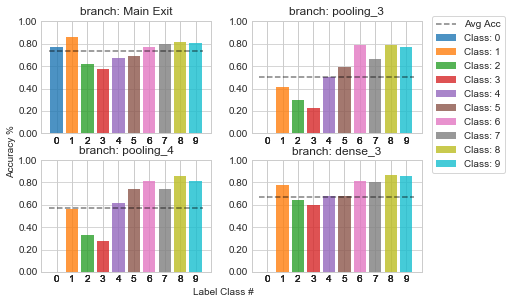

In [108]:
y = graphclassAccuracy(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","pooling_3","pooling_4","dense_3"])

In [48]:
#### something is clearly werid with the 0 class. I need to figure out what is happening.

Bar graph of Output vs Accuracy
This is for comparision of class vs no class

In [52]:
def graphOutputAccuracy(pred, labels, num_outputs, classes, output_names=[],graph=True):
    """stacked bar graph of each classes output and accuracy
        use error margins to indicate the difference between outputs at different thresholds?
    """
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    if graph==True:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
        ticks = []
        series=[]
    df =  pd.DataFrame() 
    returnData = []
    print("label classes{}".format(labelClasses))
    for i in range(num_outputs):
        print("output: {}".format(i))
        output = exitOutput()
        avgAcc, classAcc= exitAccuracy(transpose_results[i],transpose_labels[i],labelClasses)
        if graph==True:
            for j, x in enumerate(classAcc):
                ticks.append(x)
#                 print(classAcc[x])       
                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
                axs[round(int(i/2)), round(i%2)].bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
#                 if type(x) != str:
#                     axs[round(int(i/2)), round(i%2)].text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 else: 
#                     axs[round(int(i/2)), round(i%2)].text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, .74, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                axs[round(int(i/2)), round(i%2)].hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Avg Acc", linestyles="dashed", alpha=0.5)
#                 axs[round(int(i/2)), round(i%2)].text(len(classAcc.keys())-.5, .74, ' Avg Acc', ha='left', va='center')
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
    #     print(sum(classAcc.values())/len(classAcc.values()))
            
    if graph==True:        
        lines = []
        labels = []
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Label Class #', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')

        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
        plt.setp(axs, xticks=ticks, xticklabels=ticks)
#         plt.xticks(ticks)
        plt.show()
#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

label classes[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output: 0
number of classes 10
correct answer 747
correct [75, 78, 62, 64, 59, 54, 89, 86, 89, 91]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.7281553398058253, 0.8764044943820225, 0.62, 0.6213592233009708, 0.6555555555555556, 0.627906976744186, 0.7946428571428571, 0.8431372549019608, 0.839622641509434, 0.8348623853211009]
output: 1
number of classes 10
correct answer 527
correct [0, 33, 30, 31, 44, 50, 93, 75, 81, 90]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.0, 0.3707865168539326, 0.3, 0.30097087378640774, 0.4888888888888889, 0.5813953488372093, 0.8303571428571429, 0.7352941176470589, 0.7641509433962265, 0.8256880733944955]
output: 2
number of classes 10
correct answer 605
correct [0, 52, 36, 28, 55, 70, 98, 82, 96, 88]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.0, 0.5842696629213483, 0.36, 0.27184466019417475, 0.6111111111111112, 0.813953488372093, 0.875, 0.80392156

<Figure size 432x288 with 0 Axes>

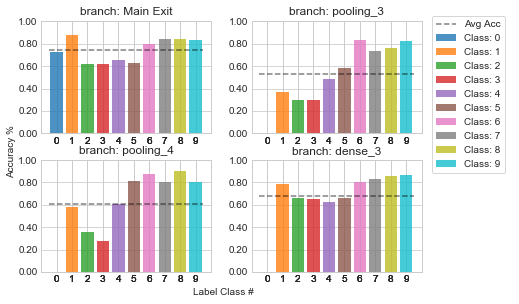

In [55]:
y = graphOutputAccuracy(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","pooling_3","pooling_4","dense_3"])